### Load libraries, create data stack, compute PCA and prepare PC and coefficients arrays.

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

stack = np.empty((0,400,400))

for fname in ["nbart_red.npy","nbart_green.npy","nbart_blue.npy",
              "nbart_nir_1.npy","nbart_nir_2.npy","nbart_swir_2.npy",
              "nbart_swir_3.npy"]:
    
    band = np.load(fname)
    stack = np.append(stack, band, axis=0)
    
stack = stack.reshape(stack.shape[0], -1)

FileNotFoundError: [Errno 2] No such file or directory: 'nbart_nir_2.npy'

(-0.42790699024307477, 0.9403958113087925)

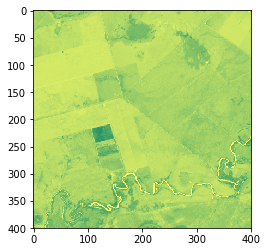

In [28]:
ndvi = ((stack[3*105:4*105,:]-stack[:105,:])/(stack[3*105:4*105,:]+stack[:105,:]))
ndvi = ndvi.reshape(-1,400,400)
t = 60

_ = plt.imshow(ndvi[t,:], vmin=0, vmax=1, cmap='summer_r')

ndvi.min(), ndvi.max()

In [121]:
from sklearn.decomposition import PCA
    
pca = PCA(n_components=20).fit(stack)
coeffs = pca.transform(stack)
pcs = pca.components_.reshape(-1,400,400)

coeffs.shape, pcs.shape

((735, 20), (20, 400, 400))

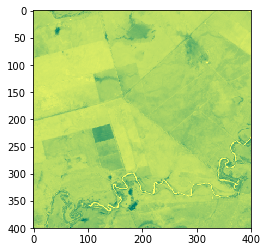

In [122]:
sub_coeffs = coeffs[3*105:4*105, :]-coeffs[:105, :]
add_coeffs = coeffs[3*105:4*105, :]+coeffs[:105, :]

add_rec = 2*np.copy(pca.mean_.reshape((400,400)))
sub_rec = np.zeros((400,400), dtype=np.float32)
for n_pc in range(20):
    add_rec += add_coeffs[t,n_pc] * pcs[n_pc]
    sub_rec += sub_coeffs[t,n_pc] * pcs[n_pc]

_ = plt.imshow(sub_rec/add_rec, vmin=0, vmax=1, cmap='summer_r')

In [125]:
from ipywidgets import interactive
import ipywidgets as widgets

sub_coeffs = coeffs[3*105:4*105, :]-coeffs[:105, :]
add_coeffs = coeffs[3*105:4*105, :]+coeffs[:105, :]
    
def plot_ndvi(t, n):
    #print(type(pcs), pcs)
    add_rec = 2*np.copy(pca.mean_.reshape((400,400)))
    sub_rec = np.zeros((400,400), dtype=np.float32)
    for n_pc in range(n):
        add_rec += add_coeffs[t,n_pc] * pcs[n_pc]
        sub_rec += s
        
        
        ub_coeffs[t,n_pc] * pcs[n_pc]
        
    f, axarr = plt.subplots(1, 3, figsize=(12,6))

    axarr[0].imshow(ndvi[t,:], vmin=0, vmax=1, cmap='summer_r')
    axarr[1].imshow(sub_rec/add_rec, vmin=0, vmax=1, cmap='summer_r')
    axarr[2].imshow(sub_rec/add_rec-ndvi[t,:], vmin=-1, vmax=1, cmap='seismic')

interactive_plot = interactive(plot_ndvi, 
                               t=widgets.IntSlider(min=0, max=105, step=1, 
                                                   value=0, continuous_update=False),
                               n=widgets.IntSlider(min=0, max=20, step=1, 
                                                   value=20, continuous_update=False))
output = interactive_plot.children[-1]
output.layout.height = '350px'

interactive_plot

interactive(children=(IntSlider(value=0, continuous_update=False, description='t', max=105), IntSlider(value=2…

In [149]:
from ipywidgets import interactive
import ipywidgets as widgets
    
def plot_rgb(t, n):
    red_rec = np.copy(pca.mean_.reshape((400,400)))
    green_rec = np.copy(pca.mean_.reshape((400,400)))
    blue_rec = np.copy(pca.mean_.reshape((400,400)))
    
    for n_pc in range(n):
        red_rec += coeffs[t,n_pc] * pcs[n_pc]
        green_rec += coeffs[105+t,n_pc] * pcs[n_pc]
        blue_rec += coeffs[210+t,n_pc] * pcs[n_pc]
        
    f, axarr = plt.subplots(1, 2, figsize=(12,6))

    rec_rgb = np.dstack((red_rec,green_rec,blue_rec))
    rgb = np.dstack((stack[t],stack[105+t],stack[210+t])).reshape(400,400,3)
    
    axarr[0].imshow(3*rgb)
    axarr[1].imshow(3*rec_rgb)

interactive_plot = interactive(plot_rgb, 
                               t=widgets.IntSlider(min=0, max=105, step=1, 
                                                   value=0, continuous_update=False),
                               n=widgets.IntSlider(min=0, max=20, step=1, 
                                                   value=20, continuous_update=False))
output = interactive_plot.children[-1]
output.layout.height = '350px'

interactive_plot

interactive(children=(IntSlider(value=0, continuous_update=False, description='t', max=105), IntSlider(value=2…

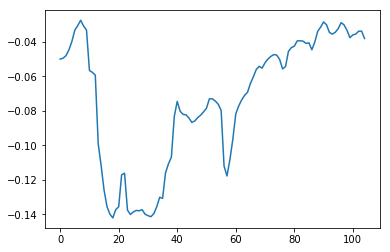

In [127]:
#stats for point [200,200]

coeffs.shape, pcs.shape

pcs_point = pcs[:,200,200]

pcs_point.shape

ts = np.einsum('ji,i->j', coeffs[:105], pcs_point, optimize=True)

plt.plot(ts)

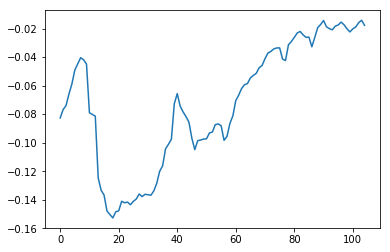

In [144]:
#stats for point [200,200]

coeffs.shape, pcs.shape

pcs_point = pcs[:,300,300]

pcs_point.shape

ts = np.einsum('ji,i->j', coeffs[:105], pcs_point, optimize=True)

plt.plot(ts)

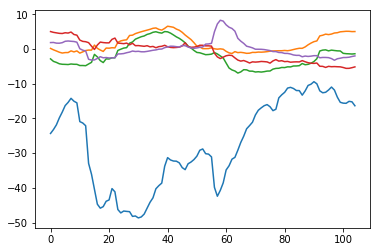

In [128]:
plt.plot(coeffs[:105,:5])

<BarContainer object of 20 artists>

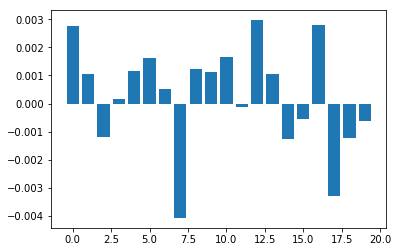

In [129]:
plt.bar(np.arange(pcs_point.shape[0]), pcs_point)

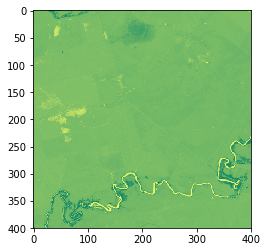

In [134]:
plt.imshow(np.percentile(ndvi, .25, axis=0), cmap='summer_r')

In [138]:
np.percentile(coeffs[:105,0], .25)

-48.59944801835258

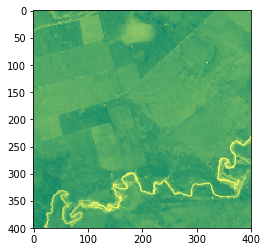

In [143]:
plt.imshow(pcs[0], cmap='summer_r')

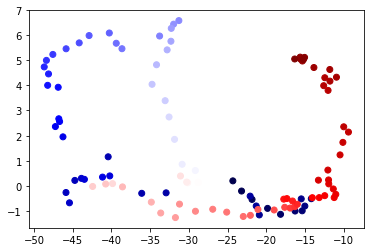

In [148]:
plt.scatter(coeffs[:105,0],coeffs[:105,1], c=np.arange(105), cmap=plt.cm.seismic)